In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyforest

In [3]:
train_data = pd.read_csv("Data_Train.csv")

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
train_data.head()

,Market Place,Crop Variety,Producer Min,Producer Max,Wholesale Min,Wholesale Max,Retail Min,Retail Max,Volume,Collection Date
0,Enjbara,White Teff (Quintal),0,0.0,3200,3250,3300.0,3400,Sufficient,12/10/2019
1,Debretabor Segno Gebeya,White Teff (Quintal),0,0.0,3100,3150,3200.0,3250,Under,12/10/2019
2,Woldia Gebeya,White Teff (Quintal),2691,2760.0,0,0,2760.0,2829,Sufficient,12/10/2019
3,kombolcha kebele 03 Gebeya,White Teff (Quintal),0,0.0,2940,3000,3100.0,3300,Sufficient,12/11/2019
4,Bahir Dar kebele 04,White Teff (Quintal),0,0.0,3300,3500,3450.0,3650,Sufficient,12/12/2019


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1522 entries, 0 to 1521
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Market Place     1522 non-null   object 
 1   Crop Variety     1522 non-null   object 
 2   Producer Min     1522 non-null   int64  
 3   Producer Max     1522 non-null   float64
 4   Wholesale Min    1522 non-null   int64  
 5   Wholesale Max    1522 non-null   int64  
 6   Retail Min       1522 non-null   float64
 7   Retail Max       1522 non-null   int64  
 8   Volume           1522 non-null   object 
 9   Collection Date  1522 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 119.0+ KB


In [7]:
train_data.dropna(inplace = True)

In [8]:
train_data.isnull().sum()

Market Place       0
Crop Variety       0
Producer Min       0
Producer Max       0
Wholesale Min      0
Wholesale Max      0
Retail Min         0
Retail Max         0
Volume             0
Collection Date    0
dtype: int64

In [9]:
train_data = train_data.drop(columns='Retail Min')# multiple in one (['f','h])

In [10]:
train_data = train_data.drop(columns='Wholesale Max')# multiple in one (['f','h])

In [11]:
train_data = train_data.drop(columns='Wholesale Min')# multiple in one (['f','h])

In [12]:
train_data = train_data.drop(columns='Producer Max')# multiple in one (['f','h])

In [13]:
train_data = train_data.drop(columns='Producer Min')# multiple in one (['f','h])

In [14]:
train_data.head()

,Market Place,Crop Variety,Retail Max,Volume,Collection Date
0,Enjbara,White Teff (Quintal),3400,Sufficient,12/10/2019
1,Debretabor Segno Gebeya,White Teff (Quintal),3250,Under,12/10/2019
2,Woldia Gebeya,White Teff (Quintal),2829,Sufficient,12/10/2019
3,kombolcha kebele 03 Gebeya,White Teff (Quintal),3300,Sufficient,12/11/2019
4,Bahir Dar kebele 04,White Teff (Quintal),3650,Sufficient,12/12/2019


In [15]:
train_data["Collection Date"][4]

'12/12/2019'

In [16]:
train_data["Collection Date"].value_counts()

Collection Date
7/18/2020     5
5/9/2020      5
12/24/2020    5
8/29/2020     4
5/12/2020     4
             ..
8/16/2021     1
8/17/2021     1
8/23/2021     1
8/25/2021     1
6/15/2022     1
Name: count, Length: 639, dtype: int64

In [17]:
str = train_data["Collection Date"][1]#taking any arbitrary data spliting it by calling split methode
str2 = str.split()#spliting it to 5,/,1,/,2019   thus str[6] out of range 
print(str)
print(str2)
print(str[0])

12/10/2019
['12/10/2019']
1


In [18]:
#creating dictionary to store the months in
Dict = {1 :"January", 2:"February", 3:"March", 4:"April", 5:"May", 6:"June", 7:"July", 8:"August", 9:"September", 10:"October", 11:"November", 12:"December"}
print(Dict)

{1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}


In [19]:
Dict[3]

'March'

In [20]:
month = []#creating empty column

In [21]:
for rr in train_data["Collection Date"]:
    str = rr
    str2 = str.split('/')
    month.append(Dict[int(str2[0])])#taking the first term, (month) from the splited

In [22]:
len(month)

1522

In [23]:
train_data["month"] = month

In [24]:
train_data["month"]

0       December
1       December
2       December
3       December
4       December
          ...   
1517        June
1518        June
1519        June
1520        June
1521        June
Name: month, Length: 1522, dtype: object

In [25]:
train_data["month"].unique()

array(['December', 'January', 'February', 'March', 'April', 'May', 'June',
       'July', 'August', 'September', 'October', 'November'], dtype=object)

In [26]:
season =[]#creating empty column of season

In [27]:
for tt in train_data["month"]:
    if tt== "December" or tt=="January" or tt=="February":
        season.append("Winter")
    elif tt=="March" or tt=="April" or tt== "May":
            season.append("Autumn")
    elif tt=="June" or tt=="July" or tt == "August":
            season.append("Summer")
    elif tt=="September" or tt=="October" or tt== "November":
            season.append("Spring")

In [28]:
len(season)

1522

In [29]:
train_data["season"] = season

In [30]:
train_data["season"]

0       Winter
1       Winter
2       Winter
3       Winter
4       Winter
         ...  
1517    Summer
1518    Summer
1519    Summer
1520    Summer
1521    Summer
Name: season, Length: 1522, dtype: object

In [31]:
df = pd.Timestamp("5/3/2023")
print(df.dayofweek)# will give each day like 0 = monday, 1=tuesday....

2


In [32]:
day_of_week = []

In [33]:
for rr in train_data["Collection Date"]:#finding out value of each date and craating day column
    str = rr
    df = pd.Timestamp(rr)
    day = df.dayofweek
    day_of_week.append(day)

In [34]:
len(day_of_week)

1522

In [35]:
train_data["day"]=day_of_week # putting the created day column to the data

In [36]:
train_data.head()

,Market Place,Crop Variety,Retail Max,Volume,Collection Date,month,season,day
0,Enjbara,White Teff (Quintal),3400,Sufficient,12/10/2019,December,Winter,1
1,Debretabor Segno Gebeya,White Teff (Quintal),3250,Under,12/10/2019,December,Winter,1
2,Woldia Gebeya,White Teff (Quintal),2829,Sufficient,12/10/2019,December,Winter,1
3,kombolcha kebele 03 Gebeya,White Teff (Quintal),3300,Sufficient,12/11/2019,December,Winter,2
4,Bahir Dar kebele 04,White Teff (Quintal),3650,Sufficient,12/12/2019,December,Winter,3


In [37]:
train_data = train_data.drop(columns='Collection Date') #delating the column collection date not necessary any more

<Axes: >

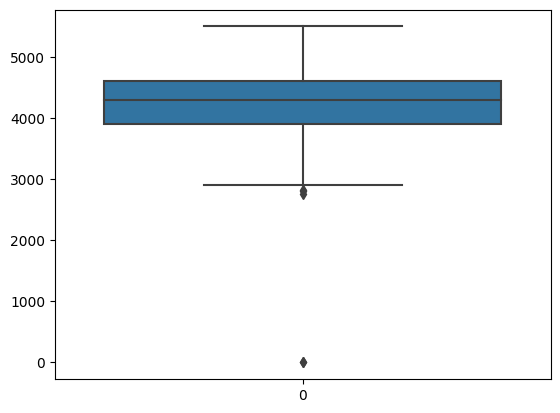

In [38]:
import seaborn as sns
sns.boxplot(train_data['Retail Max'])# look if there are out layers and remove them

# Removing out layers of Retail Max price 25%<values<75% out of this range

In [39]:
#IQR
Q1=np.percentile(train_data['Retail Max'], 25,interpolation="midpoint")
Q3=np.percentile(train_data['Retail Max'], 75,interpolation="midpoint")
IQR=Q3-Q1

C:\Users\user\AppData\Local\Temp\ipykernel_9632\2224430760.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1=np.percentile(train_data['Retail Max'], 25,interpolation="midpoint")
C:\Users\user\AppData\Local\Temp\ipykernel_9632\2224430760.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3=np.percentile(train_data['Retail Max'], 75,interpolation="midpoint")


In [40]:
#Upper bound
upper=np.where(train_data['Retail Max']>=(Q3+1.5*IQR))
#Lower bound
lower=np.where(train_data['Retail Max']<=(Q1-1.5*IQR))


In [41]:
print(upper[0],lower[0])

[] [  2  14  28 538 773]


In [42]:
#...Removing the outliers...
train_data.drop(upper[0], inplace=True)
train_data.drop(lower[0], inplace=True)

print("New Shape: ", train_data.shape)    

New Shape:  (1517, 7)


<Axes: >

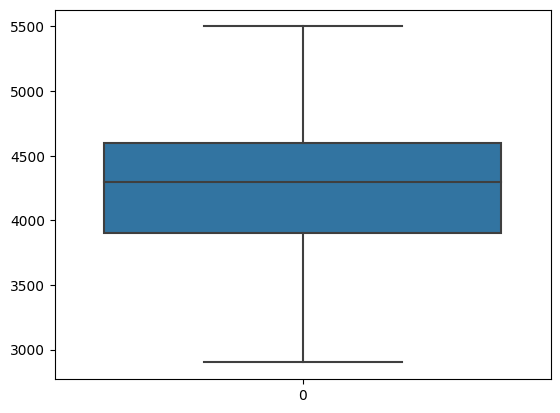

In [43]:
sns.boxplot(train_data['Retail Max'])

# Graphical Analysis

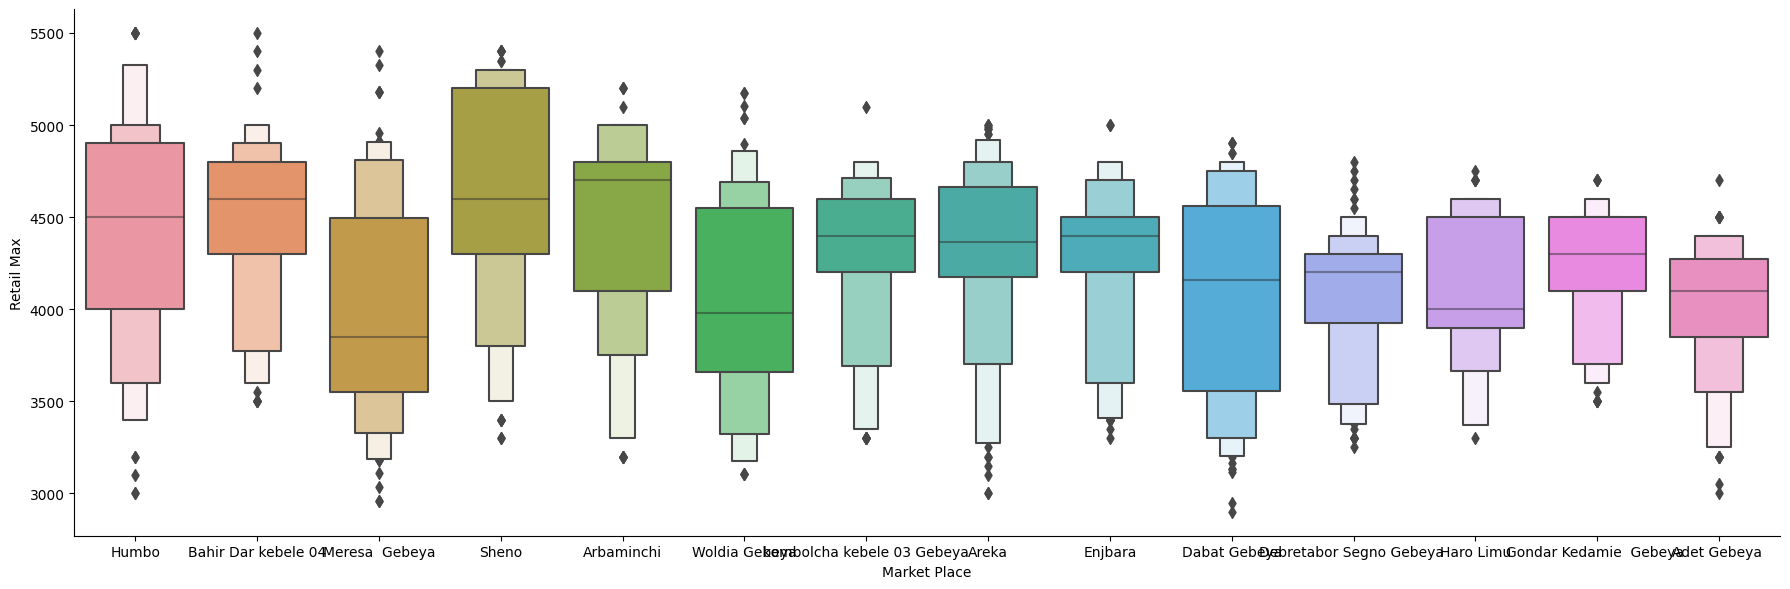

In [44]:
# market place  vs retail max
sns.catplot(y = "Retail Max", x = "Market Place", data = train_data.sort_values("Retail Max", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

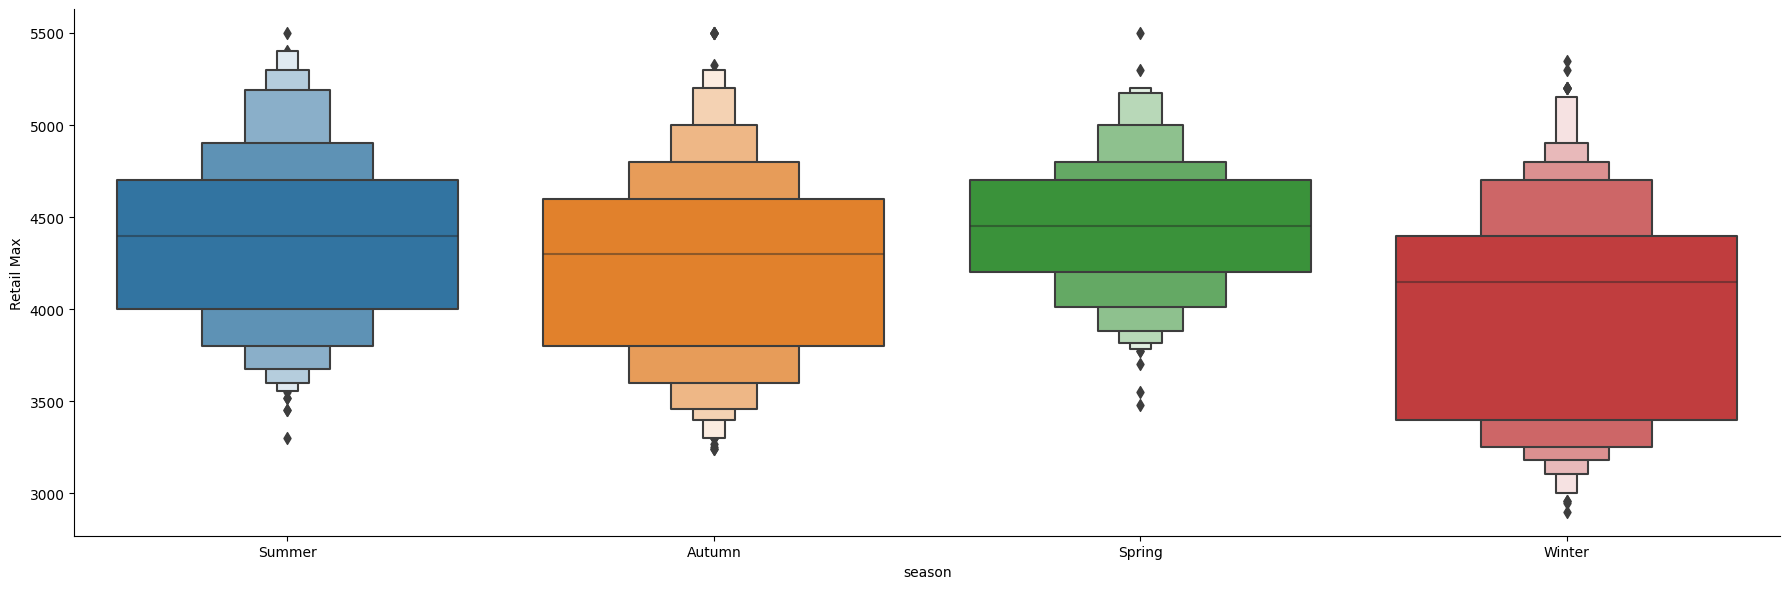

In [45]:
# market place  vs retail max
sns.catplot(y = "Retail Max", x = "season", data = train_data.sort_values("Retail Max", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

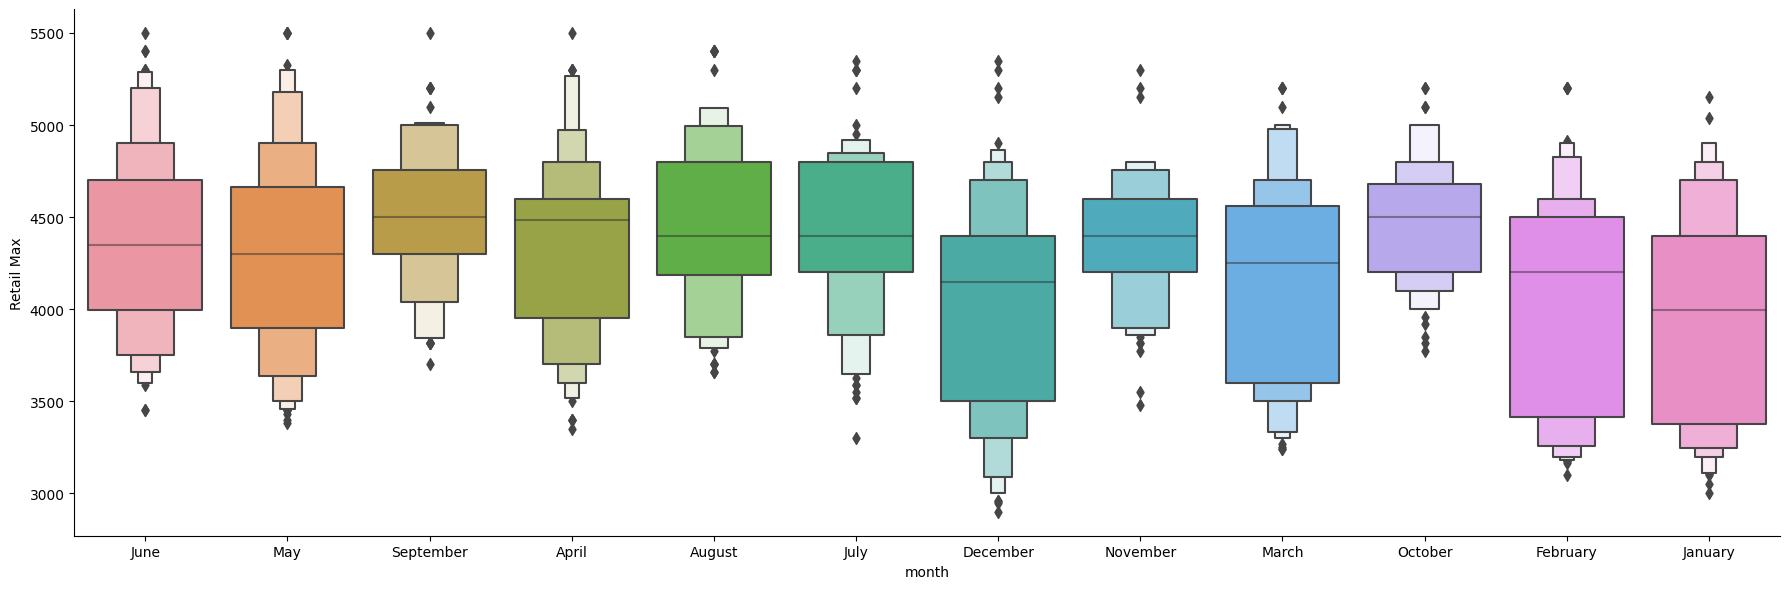

In [46]:
# market place  vs retail max
sns.catplot(y = "Retail Max", x = "month", data = train_data.sort_values("Retail Max", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

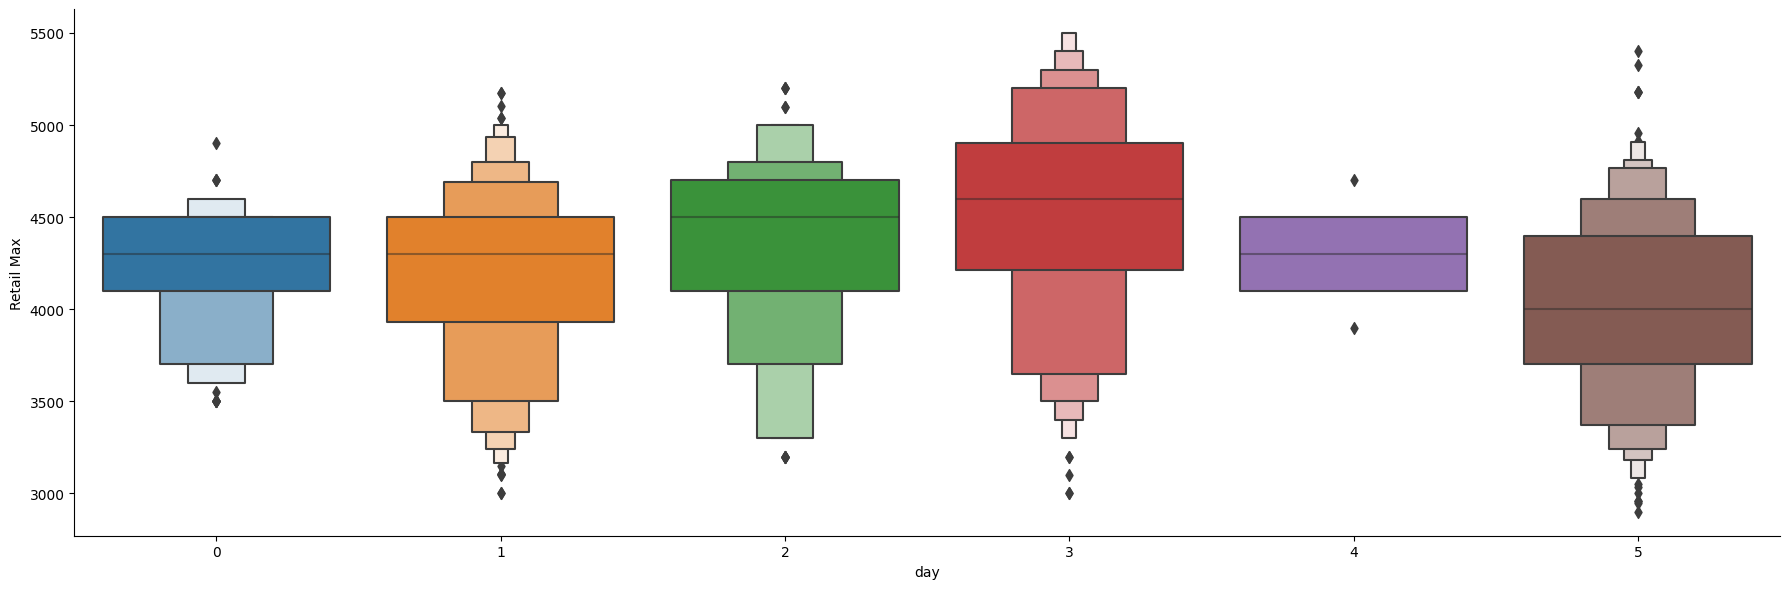

In [47]:
# market place  vs retail max
sns.catplot(y = "Retail Max", x = "day", data = train_data.sort_values("Retail Max", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

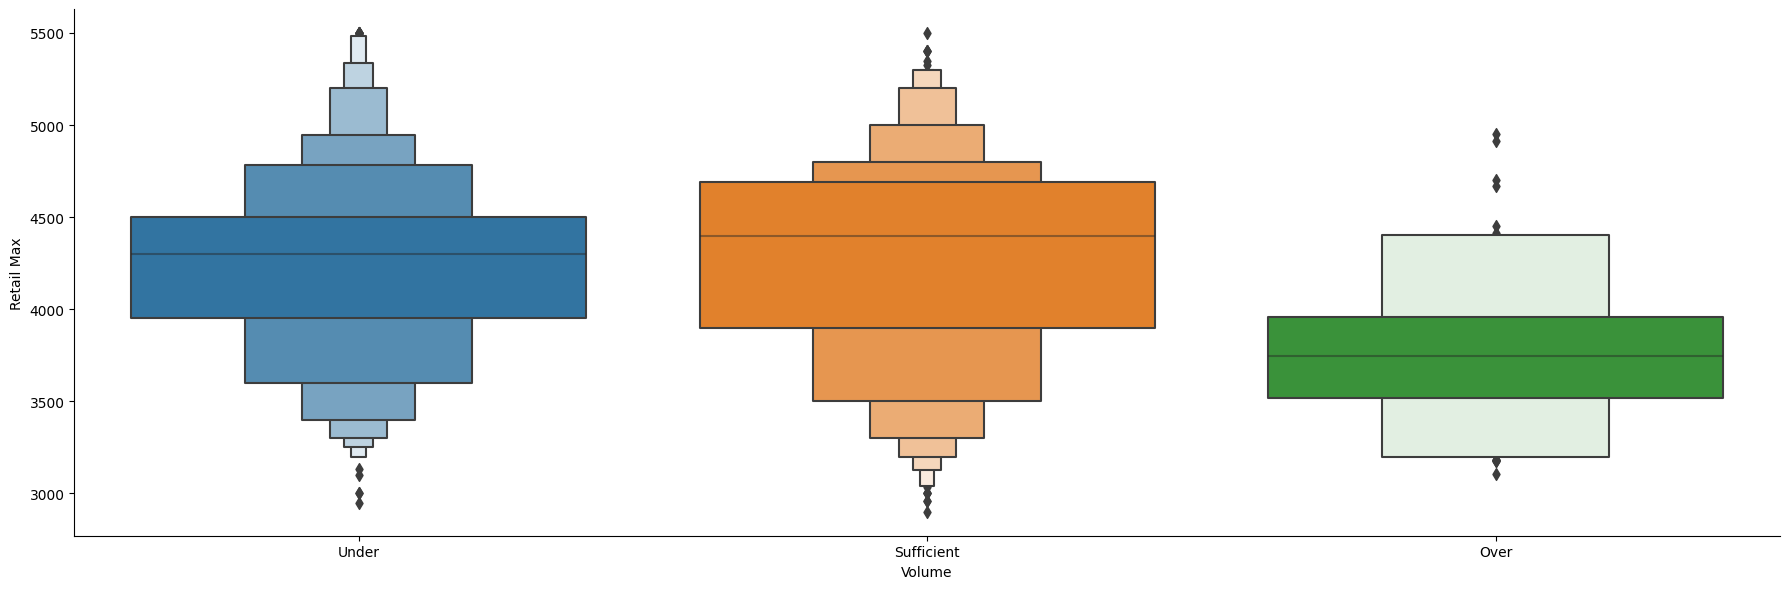

In [48]:
# market place  vs retail max
sns.catplot(y = "Retail Max", x = "Volume", data = train_data.sort_values("Retail Max", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [49]:
train_data.head()

,Market Place,Crop Variety,Retail Max,Volume,month,season,day
0,Enjbara,White Teff (Quintal),3400,Sufficient,December,Winter,1
1,Debretabor Segno Gebeya,White Teff (Quintal),3250,Under,December,Winter,1
3,kombolcha kebele 03 Gebeya,White Teff (Quintal),3300,Sufficient,December,Winter,2
4,Bahir Dar kebele 04,White Teff (Quintal),3650,Sufficient,December,Winter,3
5,Sheno,White Teff (Quintal),3500,Sufficient,December,Winter,3


In [50]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1517 entries, 0 to 1521
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Market Place  1517 non-null   object
 1   Crop Variety  1517 non-null   object
 2   Retail Max    1517 non-null   int64 
 3   Volume        1517 non-null   object
 4   month         1517 non-null   object
 5   season        1517 non-null   object
 6   day           1517 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 127.1+ KB


# Changing the object data types in to numeric values using oneHotEncoding technique

In [51]:
# As market place is Nominal Categorical data we will perform OneHotEncoding

Market_Place = train_data[["Market Place"]]

Market_Place = pd.get_dummies(Market_Place, drop_first= True)

Market_Place.head()

,Market Place_Arbaminchi,Market Place_Areka,Market Place_Bahir Dar kebele 04,Market Place_Dabat Gebeya,Market Place_Debretabor Segno Gebeya,Market Place_Enjbara,Market Place_Gondar Kedamie Gebeya,Market Place_Haro Limu,Market Place_Humbo,Market Place_Meresa Gebeya,Market Place_Sheno,Market Place_Woldia Gebeya,Market Place_kombolcha kebele 03 Gebeya
0,False,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,True,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,True,False,False


In [52]:
# As crop variety is Nominal Categorical data we will perform OneHotEncoding

Crop_Variety = train_data[["Crop Variety"]]

Crop_Variety = pd.get_dummies(Crop_Variety, drop_first= True)

Crop_Variety.head()

""
0
1
3
4
5


In [53]:
# As volume is Nominal Categorical data we will perform OneHotEncoding

Volume = train_data[["Volume"]]

Volume = pd.get_dummies(Volume, drop_first= True)

Volume.head()

,Volume_Sufficient,Volume_Under
0,True,False
1,False,True
3,True,False
4,True,False
5,True,False


In [54]:
# As season is Nominal Categorical data we will perform OneHotEncoding

season = train_data[["season"]]

season = pd.get_dummies(season, drop_first= True)

season.head(10)# the rest for the upsent == autumn

,season_Spring,season_Summer,season_Winter
0,False,False,True
1,False,False,True
3,False,False,True
4,False,False,True
5,False,False,True
6,False,False,True
7,False,False,True
8,False,False,True
9,False,False,True
10,False,False,True


In [55]:
# As month is Nominal Categorical data we will perform OneHotEncoding

month = train_data[["month"]]

month = pd.get_dummies(month, drop_first= True)

month.head()# 

,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,False,True,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False
5,False,True,False,False,False,False,False,False,False,False,False


#concatenation of the columns to the data

In [56]:
data_train  = pd.concat([train_data, Market_Place, Crop_Variety, Volume, season, month ], axis = 1)

In [57]:
data_train.head()

,Market Place,Crop Variety,Retail Max,Volume,month,season,day,Market Place_Arbaminchi,Market Place_Areka,Market Place_Bahir Dar kebele 04,Market Place_Dabat Gebeya,Market Place_Debretabor Segno Gebeya,Market Place_Enjbara,Market Place_Gondar Kedamie Gebeya,Market Place_Haro Limu,Market Place_Humbo,Market Place_Meresa Gebeya,Market Place_Sheno,Market Place_Woldia Gebeya,Market Place_kombolcha kebele 03 Gebeya,Volume_Sufficient,Volume_Under,season_Spring,season_Summer,season_Winter,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,Enjbara,White Teff (Quintal),3400,Sufficient,December,Winter,1,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False
1,Debretabor Segno Gebeya,White Teff (Quintal),3250,Under,December,Winter,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False
3,kombolcha kebele 03 Gebeya,White Teff (Quintal),3300,Sufficient,December,Winter,2,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False
4,Bahir Dar kebele 04,White Teff (Quintal),3650,Sufficient,December,Winter,3,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False
5,Sheno,White Teff (Quintal),3500,Sufficient,December,Winter,3,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False


# delating the oneHotEncoded columns

In [58]:
df = data_train.copy()# copying the pre proccessed data incase 

In [59]:
data_train.head()

,Market Place,Crop Variety,Retail Max,Volume,month,season,day,Market Place_Arbaminchi,Market Place_Areka,Market Place_Bahir Dar kebele 04,Market Place_Dabat Gebeya,Market Place_Debretabor Segno Gebeya,Market Place_Enjbara,Market Place_Gondar Kedamie Gebeya,Market Place_Haro Limu,Market Place_Humbo,Market Place_Meresa Gebeya,Market Place_Sheno,Market Place_Woldia Gebeya,Market Place_kombolcha kebele 03 Gebeya,Volume_Sufficient,Volume_Under,season_Spring,season_Summer,season_Winter,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,Enjbara,White Teff (Quintal),3400,Sufficient,December,Winter,1,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False
1,Debretabor Segno Gebeya,White Teff (Quintal),3250,Under,December,Winter,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False
3,kombolcha kebele 03 Gebeya,White Teff (Quintal),3300,Sufficient,December,Winter,2,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False
4,Bahir Dar kebele 04,White Teff (Quintal),3650,Sufficient,December,Winter,3,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False
5,Sheno,White Teff (Quintal),3500,Sufficient,December,Winter,3,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False


In [60]:
data_train.drop(["Market Place", "Crop Variety", "Volume", "season", "month"], axis = 1, inplace = True)

In [61]:
data_train.head()

,Retail Max,day,Market Place_Arbaminchi,Market Place_Areka,Market Place_Bahir Dar kebele 04,Market Place_Dabat Gebeya,Market Place_Debretabor Segno Gebeya,Market Place_Enjbara,Market Place_Gondar Kedamie Gebeya,Market Place_Haro Limu,Market Place_Humbo,Market Place_Meresa Gebeya,Market Place_Sheno,Market Place_Woldia Gebeya,Market Place_kombolcha kebele 03 Gebeya,Volume_Sufficient,Volume_Under,season_Spring,season_Summer,season_Winter,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,3400,1,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False
1,3250,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False
3,3300,2,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False
4,3650,3,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False
5,3500,3,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False


Test Set

In [62]:
test_data = pd.read_csv("Test_set.csv")

In [63]:
test_data.head()

,Market Place,Crop Variety,Producer Min,Producer Max,Wholesale Min,Wholesale Max,Retail Min,Retail Max,Volume,Collection Date
0,kombolcha kebele 03 Gebeya,White Teff (Quintal),0,0,4680,4700,4740,4800,Sufficient,6/15/2022
1,Humbo,White Teff (Quintal),5400,5420,5440,5460,5480,5500,Under,6/16/2022
2,Sheno,White Teff (Quintal),5000,5100,0,0,5200,5300,Sufficient,6/16/2022
3,Bahir Dar kebele 04,White Teff (Quintal),0,0,4450,4550,4650,5000,Sufficient,6/16/2022
4,Adet Gebeya,White Teff (Quintal),4200,4400,0,0,4300,4500,Under,6/18/2022


#The same all pre proccessing of the test data

In [64]:
#importing 

test_data.head()
test_data.info()
test_data["Collection Date"][4]
test_data["Collection Date"].value_counts()
str = test_data["Collection Date"][1]#taking any arbitrary data spliting it by calling split methode
str2 = str.split()#spliting it to 5,/,1,/,2019   thus str[6] out of range 
print(str)
print(str2)
print(str[0])

#creating dictionary to store the months in
Dict = {1 :"January", 2:"February", 3:"March", 4:"April", 5:"May", 6:"June", 7:"July", 8:"August", 9:"September", 10:"October", 11:"November", 12:"December"}
print(Dict)
Dict[3]
month = []#creating empty column
for rr in test_data["Collection Date"]:
    str = rr
    str2 = str.split('/')
    month.append(Dict[int(str2[0])])#taking the first term, (month) from the splited
len(month)
test_data["month"] = month
test_data["month"]
test_data["month"].unique()

#creating empty column of season
season =[]
for tt in test_data["month"]:
    if tt== "December" or tt=="January" or tt=="February":
        season.append("Winter")
    elif tt=="March" or tt=="April" or tt== "May":
            season.append("Autumn")
    elif tt=="June" or tt=="July" or tt == "August":
            season.append("Summer")
    elif tt=="September" or tt=="October" or tt== "November":
            season.append("Spring")
len(season)
test_data["season"] = season
test_data["season"]
df = pd.Timestamp("5/3/2023")
print(df.dayofweek)# will give each day like 0 = monday, 1=tuesday....
day_of_week = []
for rr in test_data["Collection Date"]:#finding out value of each date and craating day column
    str = rr
    df = pd.Timestamp(rr)
    day = df.dayofweek
    day_of_week.append(day)
len(day_of_week)
test_data["day"]=day_of_week # putting the created day column to the data
test_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Market Place     381 non-null    object
 1   Crop Variety     381 non-null    object
 2   Producer Min     381 non-null    int64 
 3   Producer Max     381 non-null    int64 
 4   Wholesale Min    381 non-null    int64 
 5   Wholesale Max    381 non-null    int64 
 6   Retail Min       381 non-null    int64 
 7   Retail Max       381 non-null    int64 
 8   Volume           381 non-null    object
 9   Collection Date  381 non-null    object
dtypes: int64(6), object(4)
memory usage: 29.9+ KB
6/16/2022
['6/16/2022']
6
{1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
2


,Market Place,Crop Variety,Producer Min,Producer Max,Wholesale Min,Wholesale Max,Retail Min,Retail Max,Volume,Collection Date,month,season,day
0,kombolcha kebele 03 Gebeya,White Teff (Quintal),0,0,4680,4700,4740,4800,Sufficient,6/15/2022,June,Summer,2
1,Humbo,White Teff (Quintal),5400,5420,5440,5460,5480,5500,Under,6/16/2022,June,Summer,3
2,Sheno,White Teff (Quintal),5000,5100,0,0,5200,5300,Sufficient,6/16/2022,June,Summer,3
3,Bahir Dar kebele 04,White Teff (Quintal),0,0,4450,4550,4650,5000,Sufficient,6/16/2022,June,Summer,3
4,Adet Gebeya,White Teff (Quintal),4200,4400,0,0,4300,4500,Under,6/18/2022,June,Summer,5


In [65]:
test_data = test_data.drop(columns='Collection Date') #delating the column collection date not necessary any more

In [66]:
# As market place is Nominal Categorical data we will perform OneHotEncoding

Market_Place = test_data[["Market Place"]]

Market_Place = pd.get_dummies(Market_Place, drop_first= True)

Market_Place.head()

,Market Place_Adet Gebeya,Market Place_Arbaminchi,Market Place_Areka,Market Place_Bahir Dar kebele 04,Market Place_Dabat Gebeya,Market Place_Debretabor Segno Gebeya,Market Place_Enjbara,Market Place_Genda wuha,Market Place_Goma,Market Place_Gondar Kedamie Gebeya,Market Place_Gudumalee,Market Place_Haro Limu,Market Place_Humbo,Market Place_Lumame,Market Place_Meresa Gebeya,Market Place_Sheno,Market Place_Woldia Gebeya,Market Place_kombolcha kebele 03 Gebeya
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [67]:
# As crop variety is Nominal Categorical data we will perform OneHotEncoding

Crop_Variety = test_data[["Crop Variety"]]

Crop_Variety = pd.get_dummies(Crop_Variety, drop_first= True)

Crop_Variety.head()

""
0
1
2
3
4


In [68]:
# As volume is Nominal Categorical data we will perform OneHotEncoding

Volume = test_data[["Volume"]]

Volume = pd.get_dummies(Volume, drop_first= True)

Volume.head()

,Volume_Sufficient,Volume_Under
0,True,False
1,False,True
2,True,False
3,True,False
4,False,True


In [69]:
# As season is Nominal Categorical data we will perform OneHotEncoding

season = test_data[["season"]]

season = pd.get_dummies(season, drop_first= True)

season.head(10)# the rest for the upsent == autumn

,season_Summer,season_Winter
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False
5,True,False
6,True,False
7,True,False
8,True,False
9,True,False


In [70]:
# As month is Nominal Categorical data we will perform OneHotEncoding

month = test_data[["month"]]

month = pd.get_dummies(month, drop_first= True)

month.head()

,month_December,month_January,month_July,month_June,month_November,month_October,month_September
0,False,False,False,True,False,False,False
1,False,False,False,True,False,False,False
2,False,False,False,True,False,False,False
3,False,False,False,True,False,False,False
4,False,False,False,True,False,False,False


In [71]:
#concatenation of the columns to the data
data_test  = pd.concat([test_data, Market_Place, Crop_Variety, Volume, season, month ], axis = 1)
data_test.head()

,Market Place,Crop Variety,Producer Min,Producer Max,Wholesale Min,Wholesale Max,Retail Min,Retail Max,Volume,month,season,day,Market Place_Adet Gebeya,Market Place_Arbaminchi,Market Place_Areka,Market Place_Bahir Dar kebele 04,Market Place_Dabat Gebeya,Market Place_Debretabor Segno Gebeya,Market Place_Enjbara,Market Place_Genda wuha,Market Place_Goma,Market Place_Gondar Kedamie Gebeya,Market Place_Gudumalee,Market Place_Haro Limu,Market Place_Humbo,Market Place_Lumame,Market Place_Meresa Gebeya,Market Place_Sheno,Market Place_Woldia Gebeya,Market Place_kombolcha kebele 03 Gebeya,Volume_Sufficient,Volume_Under,season_Summer,season_Winter,month_December,month_January,month_July,month_June,month_November,month_October,month_September
0,kombolcha kebele 03 Gebeya,White Teff (Quintal),0,0,4680,4700,4740,4800,Sufficient,June,Summer,2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,False,True,False,False,False
1,Humbo,White Teff (Quintal),5400,5420,5440,5460,5480,5500,Under,June,Summer,3,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False
2,Sheno,White Teff (Quintal),5000,5100,0,0,5200,5300,Sufficient,June,Summer,3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,True,False,False,False
3,Bahir Dar kebele 04,White Teff (Quintal),0,0,4450,4550,4650,5000,Sufficient,June,Summer,3,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False
4,Adet Gebeya,White Teff (Quintal),4200,4400,0,0,4300,4500,Under,June,Summer,5,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False


In [72]:
# delating the oneHotEncoded columns
df1 = data_test.copy()# copying the pre proccessed data incase 
data_test.drop(["Market Place", "Crop Variety", "Volume", "season", "month"], axis = 1, inplace = True)
data_test.head()

,Producer Min,Producer Max,Wholesale Min,Wholesale Max,Retail Min,Retail Max,day,Market Place_Adet Gebeya,Market Place_Arbaminchi,Market Place_Areka,Market Place_Bahir Dar kebele 04,Market Place_Dabat Gebeya,Market Place_Debretabor Segno Gebeya,Market Place_Enjbara,Market Place_Genda wuha,Market Place_Goma,Market Place_Gondar Kedamie Gebeya,Market Place_Gudumalee,Market Place_Haro Limu,Market Place_Humbo,Market Place_Lumame,Market Place_Meresa Gebeya,Market Place_Sheno,Market Place_Woldia Gebeya,Market Place_kombolcha kebele 03 Gebeya,Volume_Sufficient,Volume_Under,season_Summer,season_Winter,month_December,month_January,month_July,month_June,month_November,month_October,month_September
0,0,0,4680,4700,4740,4800,2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,False,True,False,False,False
1,5400,5420,5440,5460,5480,5500,3,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False
2,5000,5100,0,0,5200,5300,3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,True,False,False,False
3,0,0,4450,4550,4650,5000,3,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False
4,4200,4400,0,0,4300,4500,5,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False


In [73]:
data_test.shape

(381, 36)

In [74]:
df =data_test.copy()

In [75]:
data_test = data_test.drop(columns='Retail Min')# multiple in one (['f','h])
data_test = data_test.drop(columns='Wholesale Max')# multiple in one (['f','h])
data_test = data_test.drop(columns='Wholesale Min')# multiple in one (['f','h])
data_test = data_test.drop(columns='Producer Max')# multiple in one (['f','h])
data_test = data_test.drop(columns='Producer Min')# multiple in one (['f','h])

In [76]:
data_test.head()

,Retail Max,day,Market Place_Adet Gebeya,Market Place_Arbaminchi,Market Place_Areka,Market Place_Bahir Dar kebele 04,Market Place_Dabat Gebeya,Market Place_Debretabor Segno Gebeya,Market Place_Enjbara,Market Place_Genda wuha,Market Place_Goma,Market Place_Gondar Kedamie Gebeya,Market Place_Gudumalee,Market Place_Haro Limu,Market Place_Humbo,Market Place_Lumame,Market Place_Meresa Gebeya,Market Place_Sheno,Market Place_Woldia Gebeya,Market Place_kombolcha kebele 03 Gebeya,Volume_Sufficient,Volume_Under,season_Summer,season_Winter,month_December,month_January,month_July,month_June,month_November,month_October,month_September
0,4800,2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,False,True,False,False,False
1,5500,3,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False
2,5300,3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,True,False,False,False
3,5000,3,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False
4,4500,5,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False


In [77]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   Retail Max                               381 non-null    int64
 1   day                                      381 non-null    int64
 2   Market Place_Adet Gebeya                 381 non-null    bool 
 3   Market Place_Arbaminchi                  381 non-null    bool 
 4   Market Place_Areka                       381 non-null    bool 
 5   Market Place_Bahir Dar kebele 04         381 non-null    bool 
 6   Market Place_Dabat Gebeya                381 non-null    bool 
 7   Market Place_Debretabor Segno Gebeya     381 non-null    bool 
 8   Market Place_Enjbara                     381 non-null    bool 
 9   Market Place_Genda wuha                  381 non-null    bool 
 10  Market Place_Goma                        381 non-null    bool 
 11  Market

In [78]:
data_test.shape

(381, 31)

Feature Selection

In [79]:
data_train.shape

(1517, 31)

In [80]:
data_train.columns

Index(['Retail Max', 'day', 'Market Place_Arbaminchi', 'Market Place_Areka',
       'Market Place_Bahir Dar kebele 04', 'Market Place_Dabat Gebeya',
       'Market Place_Debretabor Segno Gebeya ', 'Market Place_Enjbara',
       'Market Place_Gondar Kedamie  Gebeya ', 'Market Place_Haro Limu',
       'Market Place_Humbo', 'Market Place_Meresa  Gebeya',
       'Market Place_Sheno', 'Market Place_Woldia Gebeya',
       'Market Place_kombolcha kebele 03 Gebeya', 'Volume_Sufficient',
       'Volume_Under', 'season_Spring', 'season_Summer', 'season_Winter',
       'month_August', 'month_December', 'month_February', 'month_January',
       'month_July', 'month_June', 'month_March', 'month_May',
       'month_November', 'month_October', 'month_September'],
      dtype='object')

In [81]:
x = data_train.loc[: , ['day', 'Market Place_Arbaminchi', 'Market Place_Areka',
       'Market Place_Bahir Dar kebele 04', 'Market Place_Dabat Gebeya',
       'Market Place_Debretabor Segno Gebeya ', 'Market Place_Enjbara',
       'Market Place_Gondar Kedamie  Gebeya ', 'Market Place_Haro Limu',
       'Market Place_Humbo', 'Market Place_Meresa  Gebeya',
       'Market Place_Sheno', 'Market Place_Woldia Gebeya',
       'Market Place_kombolcha kebele 03 Gebeya', 'season_Spring', 'season_Summer', 'season_Winter',
       'month_August', 'month_December', 'month_February', 'month_January',
       'month_July', 'month_June', 'month_March', 'month_May',
       'month_November', 'month_October', 'month_September' ]]

In [82]:
x.head()

,day,Market Place_Arbaminchi,Market Place_Areka,Market Place_Bahir Dar kebele 04,Market Place_Dabat Gebeya,Market Place_Debretabor Segno Gebeya,Market Place_Enjbara,Market Place_Gondar Kedamie Gebeya,Market Place_Haro Limu,Market Place_Humbo,Market Place_Meresa Gebeya,Market Place_Sheno,Market Place_Woldia Gebeya,Market Place_kombolcha kebele 03 Gebeya,season_Spring,season_Summer,season_Winter,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False
1,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False
3,2,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False
4,3,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False
5,3,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False


In [83]:
y = data_train.iloc[:, 0]# if the 0 is 1 , doesn't indicate the uotpute 
y.head()

0    3400
1    3250
3    3300
4    3650
5    3500
Name: Retail Max, dtype: int64

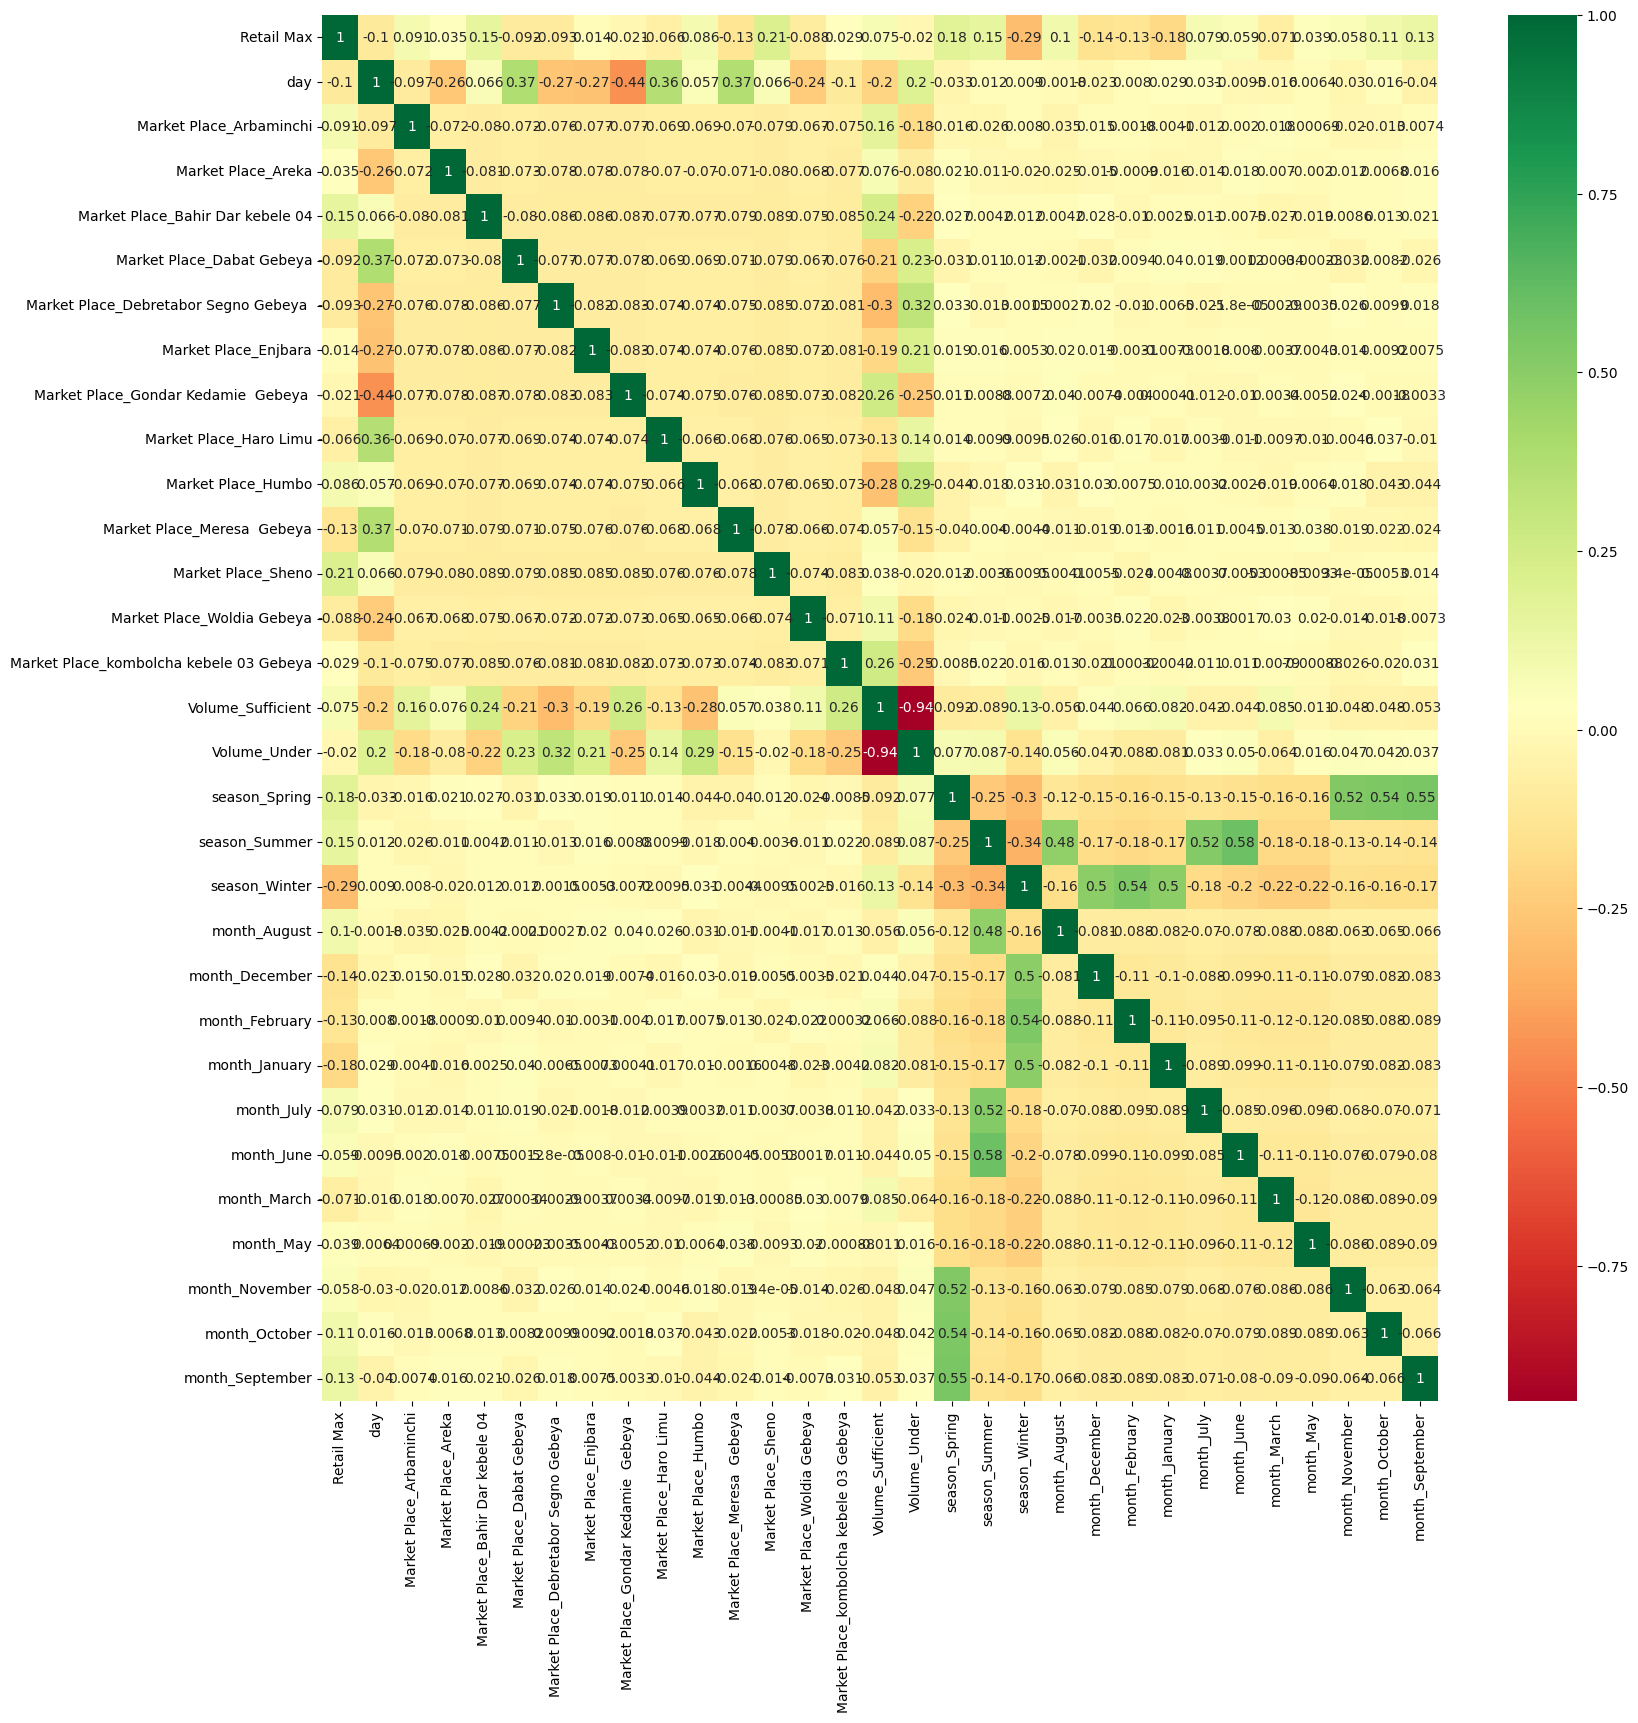

In [84]:
#
plt.figure(figsize = (18,18))
sns.heatmap(data_train.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [85]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)

ExtraTreesRegressor()

In [86]:
print(selection.feature_importances_)

[0.22006822 0.02018784 0.01258884 0.03269965 0.00797677 0.02487239
 0.011568   0.01210213 0.00743473 0.01397109 0.01615098 0.10113756
 0.02410522 0.00977844 0.03963687 0.02515961 0.26568178 0.01952514
 0.01101485 0.00344955 0.01118344 0.00641506 0.01642718 0.05891283
 0.0110111  0.00633863 0.00325587 0.00734625]


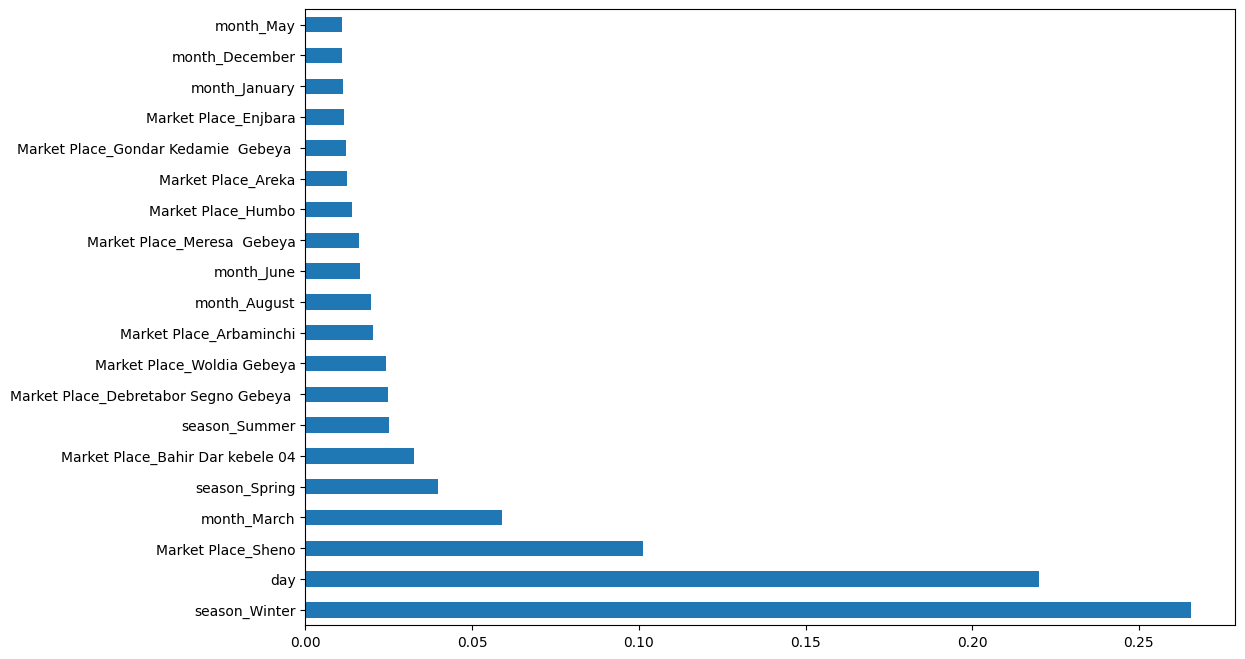

In [87]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score,f1_score, roc_auc_score, roc_curve


                Fitting model using different Algorithms 

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (x, y, test_size = 0.2, random_state = 42)

In [90]:
from sklearn.linear_model import LinearRegression

In [91]:
model = LinearRegression()

In [92]:
model.fit(X_train, y_train)

LinearRegression()

In [93]:
y_pred = model.predict(X_test)
y_pred

array([4245.17506136, 4256.95848388, 4079.88451786, 4165.39957611,
       4000.40969216, 4253.22807039, 4255.32203823, 4613.24235262,
       4517.4549991 , 4343.71342983, 4227.03635033, 4737.1225345 ,
       4487.12787616, 4131.44157137, 4003.51151406, 4519.20457868,
       4310.95797857, 4120.61394609, 4440.95886112, 3926.96409912,
       4376.5349272 , 4072.73556998, 4121.44328525, 4543.33927644,
       4279.46369745, 4703.42749259, 4168.96331548, 4140.95966829,
       4576.04194773, 4748.81124223, 4703.42749259, 3775.53951753,
       4372.80782372, 4094.2414104 , 4337.00285066, 4143.29654154,
       4446.66071978, 4218.68871654, 3997.80965914, 4165.39957611,
       4168.96331548, 4511.7530948 , 4124.28533144, 4177.12994915,
       3997.80965914, 4744.08170809, 4094.2414104 , 4169.6690761 ,
       3918.20916124, 4744.08170809, 4146.1811647 , 4611.43753413,
       4428.29623522, 4759.63908113, 3819.4958011 , 4082.74940218,
       4088.4512607 , 3730.87891878, 4165.39957611, 4343.71342

In [94]:
y_test

728     4500
817     4200
1471    4200
1474    4700
54      3300
        ... 
361     3663
1174    5300
114     3400
1297    4450
821     4500
Name: Retail Max, Length: 304, dtype: int64

In [95]:
model.score(X_train, y_train)

0.2736805297903021

In [96]:
model.score(X_test, y_test)

0.19359820604909062

C:\Users\user\AppData\Local\Temp\ipykernel_9632\3453123835.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


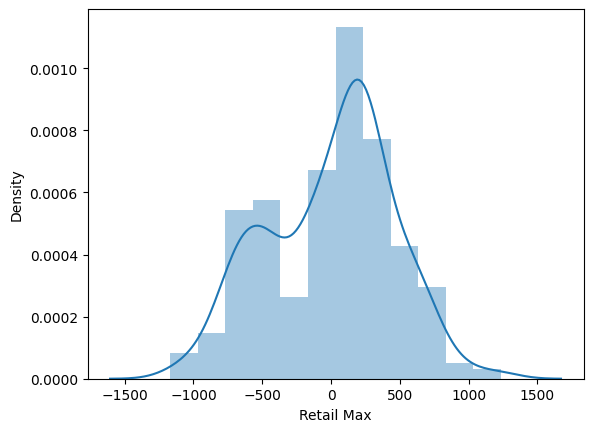

In [97]:
sns.distplot(y_test-y_pred)
plt.show()